In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency


file = "/Users/toan/Arbeit/Ironhack/day25/lab-eda-univariate/amz_uk_price_prediction_dataset.csv"

df = pd.read_csv(file, delimiter=',')
display(df)

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers
...,...,...,...,...,...,...,...,...,...
2443646,2828589,B0CHSD7P2Q,"Motorbike Armour, Motorbike Clothing, Cycling ...",0.0,0,22.34,False,0,Motorbike Clothing
2443647,2828590,B0B7B8FNBQ,PROFIRST Waterproof Motorcycle 2 Piece Ladies ...,0.0,0,97.99,False,0,Motorbike Clothing
2443648,2828591,B0BD5FL5FB,Men’s Motorcycle Motorbike Biker Trousers Kevl...,0.0,0,52.99,False,0,Motorbike Clothing
2443649,2828592,B008OYLL4I,Texpeed Mens Motorcycle Motorbike Biker Trouse...,4.3,404,79.99,False,0,Motorbike Clothing


# Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

1. Create a crosstab between the product category and the isBestSeller status.

   Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

2. Statistical Tests:

Conduct a Chi-square test to determine if the best-seller distribution is independent of the product category.
Compute Cramér's V to understand the strength of association between best-seller status and category.
Visualizations:

3. Visualize the relationship between product categories and the best-seller status using a stacked bar chart.


## 1.

In [8]:
# Create a crosstab between product category and best-seller status
crosstab = pd.crosstab(df['category'], df['isBestSeller'])

# Calculate the proportion of best-sellers in each category
crosstab['proportion'] = crosstab[True] / (crosstab[True] + crosstab[False])

# Sort categories based on the proportion of best-sellers
crosstab_sorted = crosstab.sort_values(by='proportion', ascending=False)

# Display the top 10 categories with the highest proportion of best-sellers
crosstab_sorted.head(10)

isBestSeller,False,True,proportion
category,,,
Grocery,9008,556,0.058135
Smart Home Security & Lighting,98,6,0.057692
Health & Personal Care,9017,552,0.057686
Mobile Phone Accessories,248,11,0.042471
Power & Hand Tools,8353,306,0.035339
"Billiard, Snooker & Pool",241,8,0.032129
Pet Supplies,9152,285,0.030200
Home Brewing & Wine Making,239,7,0.028455
Wind Instruments,243,7,0.028000


## 2.

In [13]:
# Chi-square test for 'MSZoning' and 'SaleCondition'
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab_sorted)

chi2_statistic, chi2_p_value

(36684.23786636857, 0.0)

In [15]:
chi2, p, dof, expected = chi2_contingency(crosstab.iloc[:, :2])

# Compute Cramér's V
n = df.shape[0]
cramers_v = np.sqrt(chi2 / (n * (min(crosstab.shape) - 1)))

chi2, p, cramers_v

(36540.20270061387, 0.0, 0.08646709890892415)

## 3.

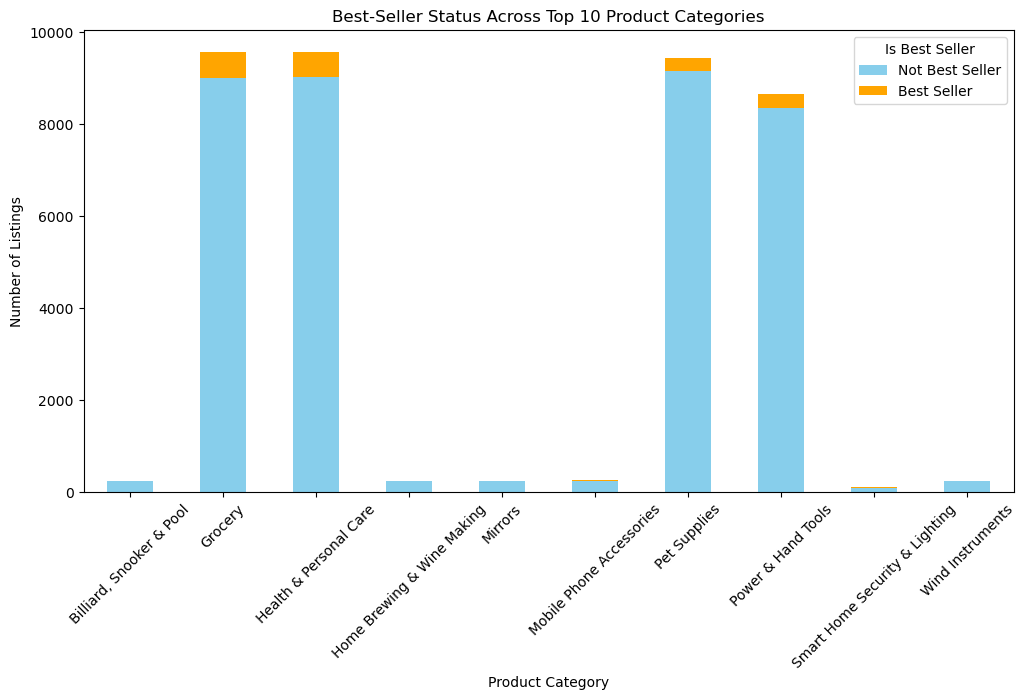

In [22]:
# Stacked bar chart of best-seller status across categories
top_10_categories = crosstab_sorted.head(10).index
df_top_10 = df[df['category'].isin(top_10_categories)]

# Crosstab for top 10 categories
crosstab_top_10 = pd.crosstab(df_top_10['category'], df_top_10['isBestSeller'])

# Plot stacked bar chart
crosstab_top_10.plot(kind='bar', stacked=True, color=['skyblue', 'orange'], figsize=(12, 6))
plt.title('Best-Seller Status Across Top 10 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45)
plt.legend(title='Is Best Seller', loc='upper right', labels=['Not Best Seller', 'Best Seller'])
plt.show()

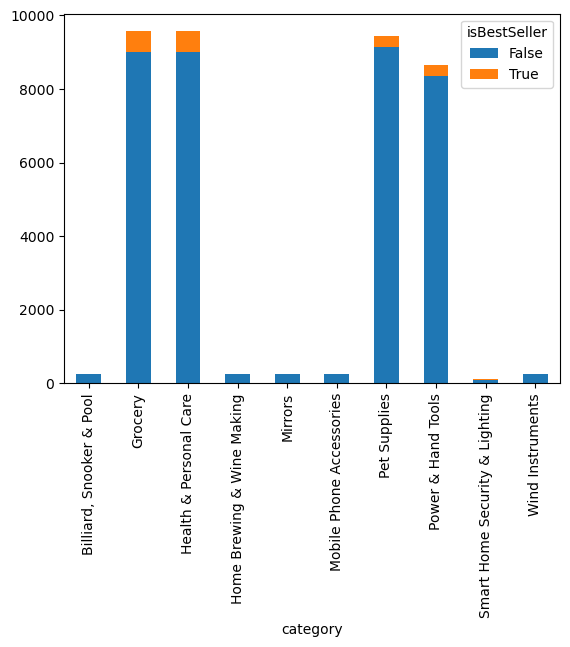

In [24]:
crosstab_top_10.plot(kind="bar", stacked=True);

# Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

0. Preliminary Step: Remove outliers in product prices.

For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.

1. Violin Plots:

Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.

2. Bar Charts:

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.

3. Box Plots:

Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.


## 0. 

In [33]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_price = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [37]:
df.shape[0], filtered_price.shape[0]

(2443651, 2115963)

## 1.

/var/folders/gb/smcfnkts5d5945c5v7zrw_p00000gn/T/ipykernel_1998/1451595070.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='price', y='category', data=df_top_20, palette='muted')


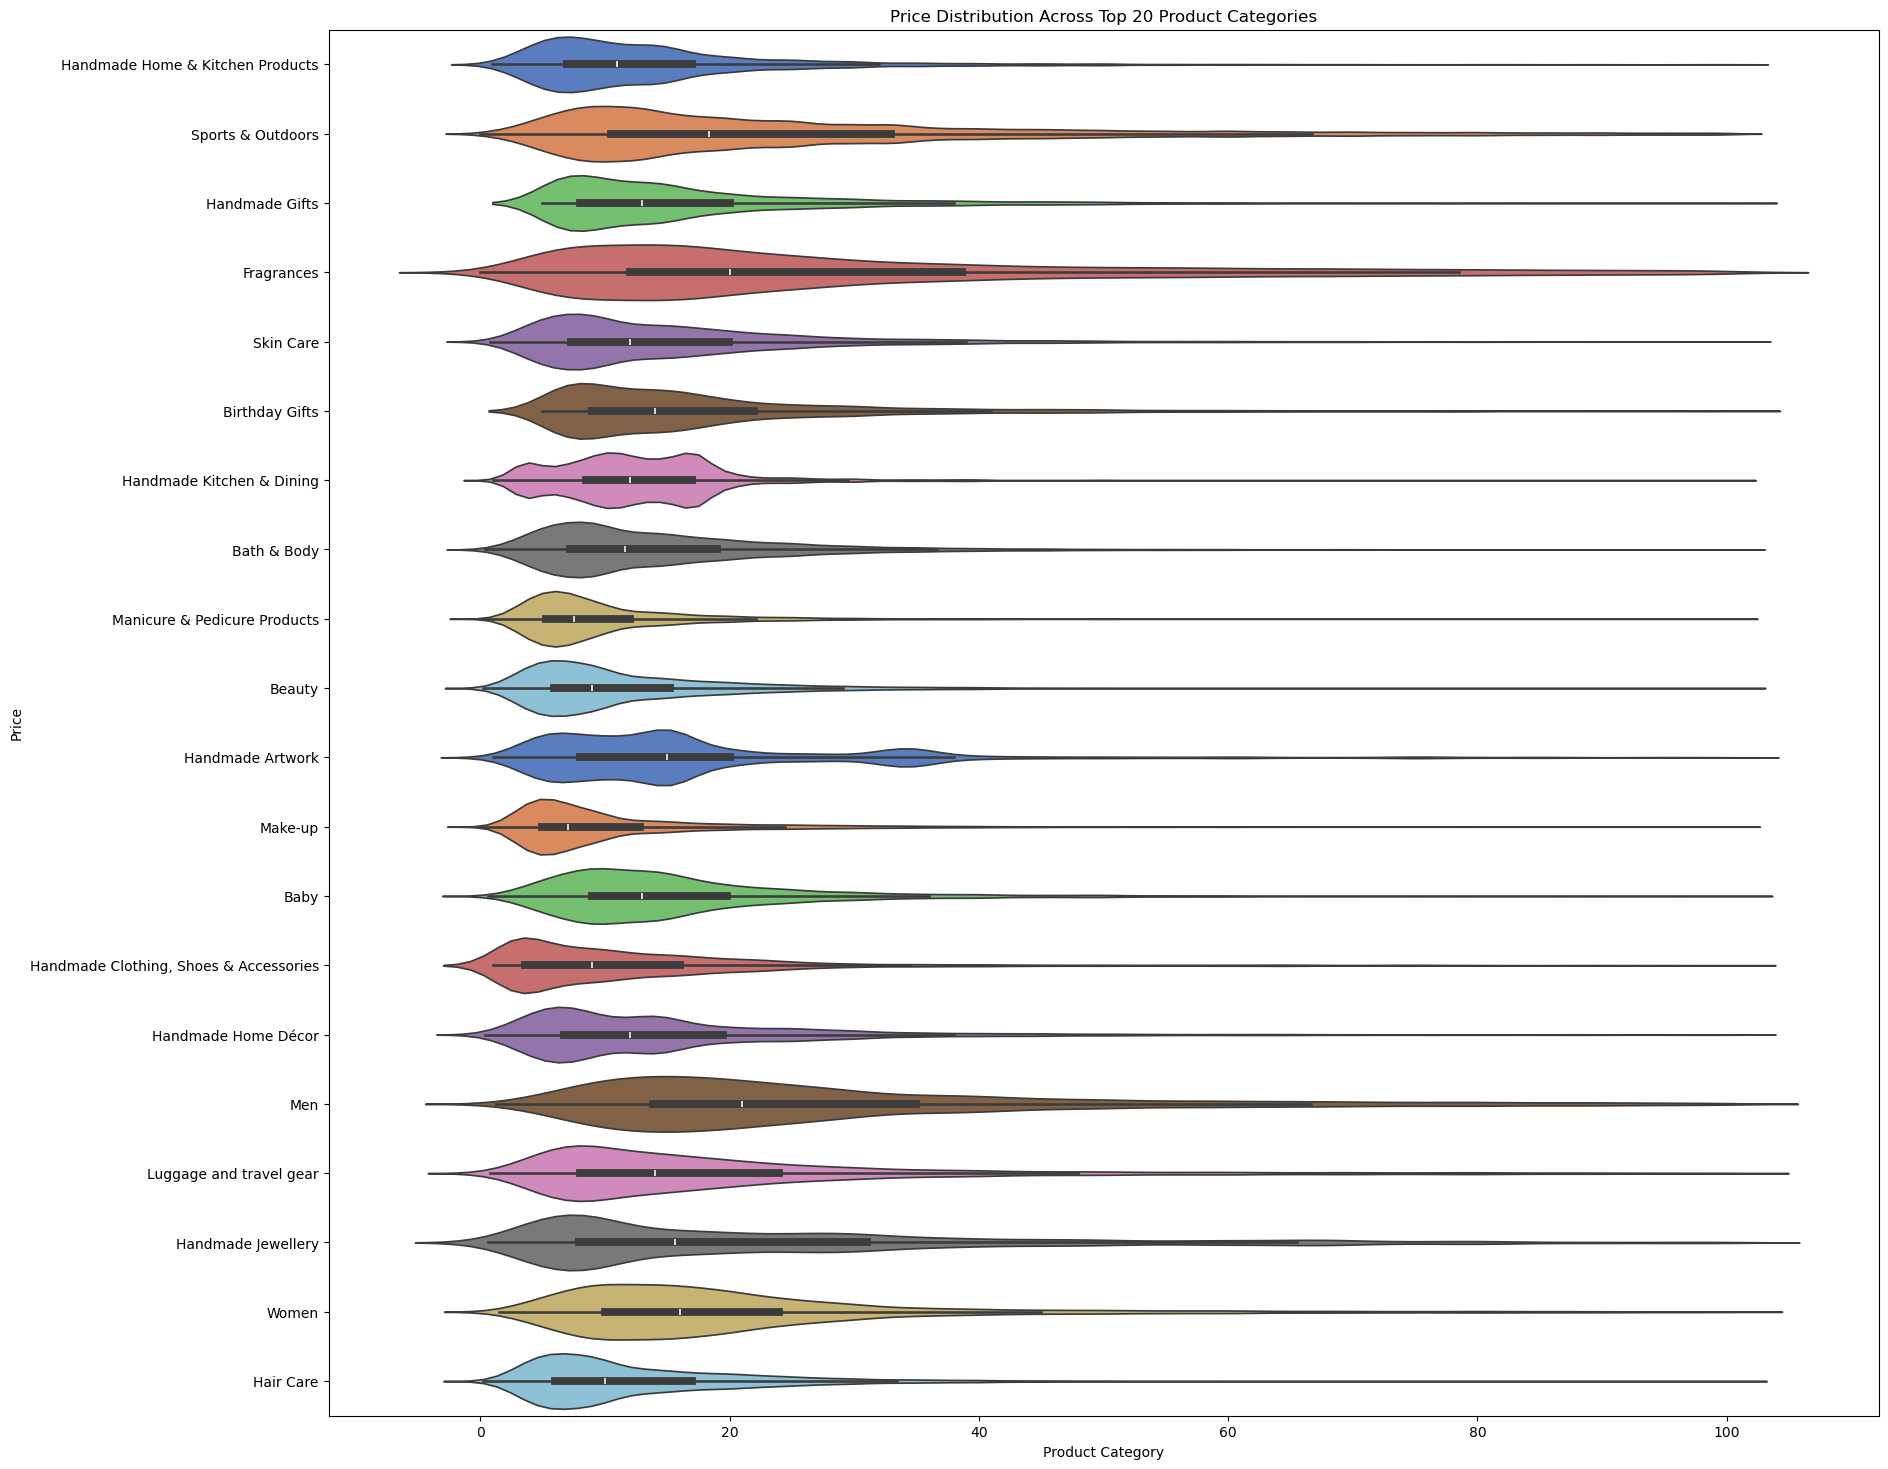

In [54]:
top_20_categories = df['category'].value_counts().head(20).index
df_top_20 = filtered_price[filtered_price['category'].isin(top_20_categories)]

# Plot violin plot for the top 20 categories
plt.figure(figsize=(20, 18))
sns.violinplot(x='price', y='category', data=df_top_20, palette='muted')
plt.title('Price Distribution Across Top 20 Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=0)
plt.show()

## 2

In [57]:
# Calculate average prices for each category
average_prices = df.groupby('category')['price'].mean()

# Top 10 categories by count
top_10_categories = df['category'].value_counts().head(10).index

# Filtered average prices for top 10 categories
average_prices_top_10 = average_prices[top_10_categories]

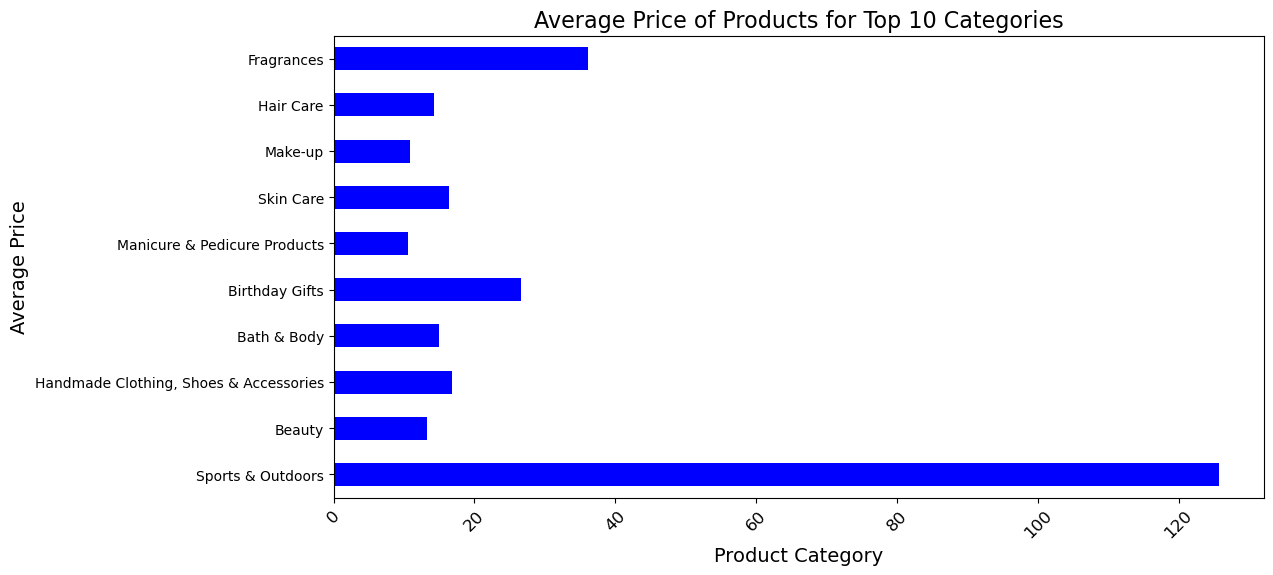

In [71]:
# Plot bar chart for the average prices of top 10 categories
plt.figure(figsize=(12, 6))
average_prices_top_10.plot(kind='barh', color='blue')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Average Price', fontsize=14)
plt.title('Average Price of Products for Top 10 Categories', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.show()

## 3

/var/folders/gb/smcfnkts5d5945c5v7zrw_p00000gn/T/ipykernel_1998/367019348.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='category', y='stars', data=df_top_10_ratings, palette='muted')


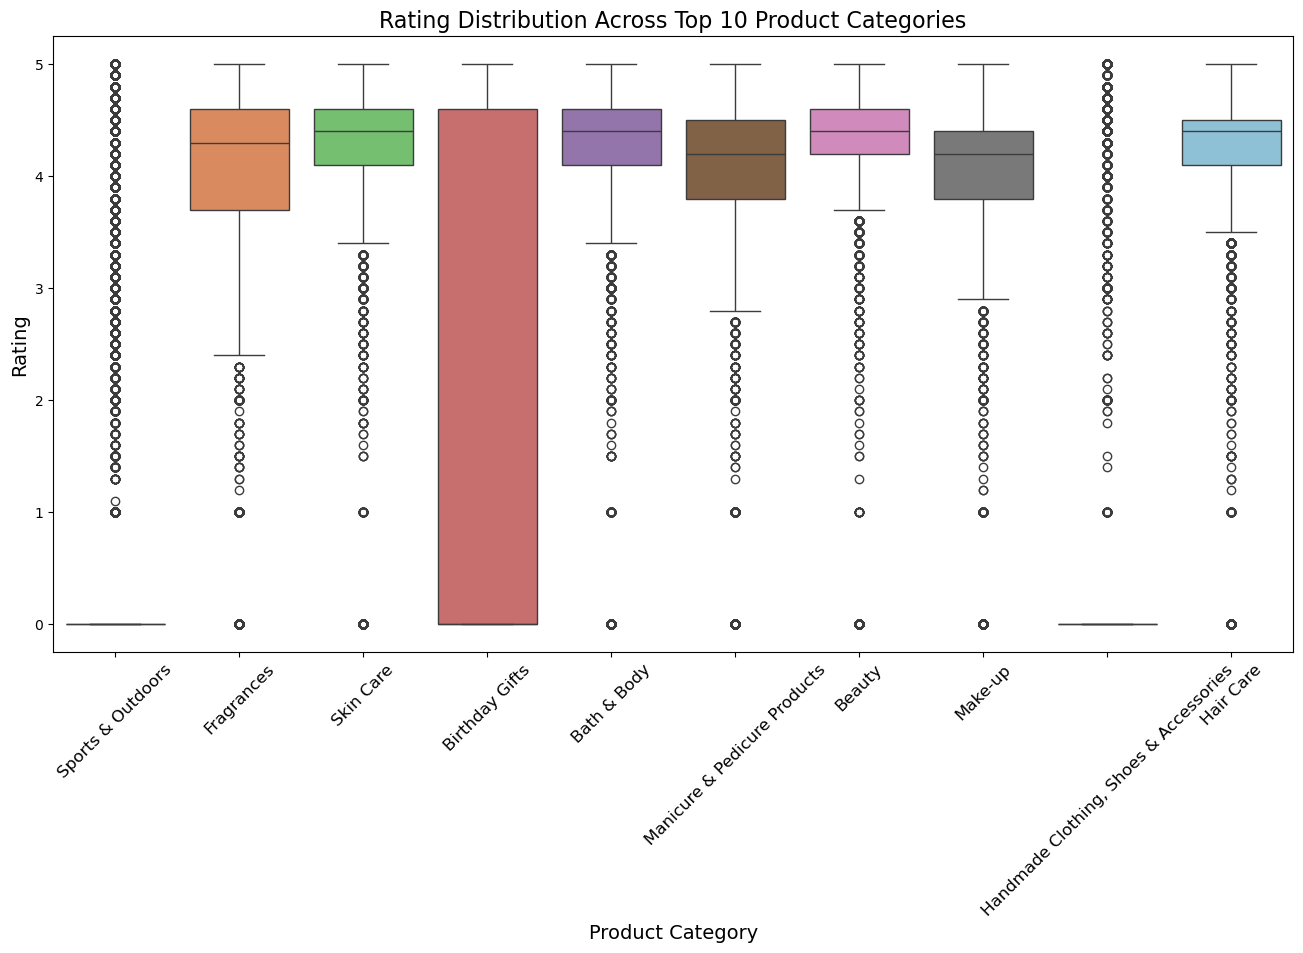

In [77]:
# Top 10 categories by count for better visualization
df_top_10_ratings = df[df['category'].isin(top_10_categories)]

# Plot box plot for ratings of top 10 categories
plt.figure(figsize=(16, 8))
sns.boxplot(x='category', y='stars', data=df_top_10_ratings, palette='muted')
plt.xlabel('Product Category', fontsize=14)
plt.ylabel('Rating', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.title('Rating Distribution Across Top 10 Product Categories', fontsize=16)
plt.show()

# Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

1. Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

2. Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

## 1 

In [89]:
# Calculating the Pearson correlation coefficient between 'SalePrice' and 'GrLivArea' columns

correlation_p = df['stars'].corr(df['price'])
print("Pearson correlation: ", correlation_p)

Pearson correlation:  -0.12490673262148384


In [91]:
# Calculating the Spearman rank correlation between 'SalePrice' and 'GrLivArea'
correlation_s = df['stars'].corr(df['price'], method='spearman')
print("Spearman correlation: ", correlation_s)

Spearman correlation:  -0.13316425462433876


## 2

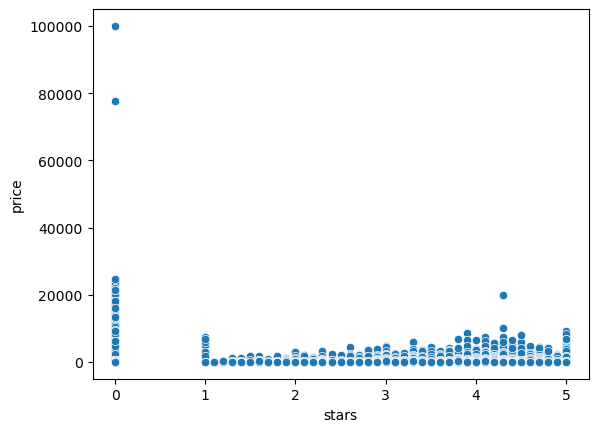

In [98]:
# Plotting a scatter plot to visualize the relationship between 'GrLivArea' and 'SalePrice'
sns.scatterplot(data=df, x='stars', y='price');